In [1]:
#Our data:

from sklearn.decomposition import DictionaryLearning
import numpy as np
import create_data_upd as OD

# Define dimensions
n_features = 4000   # Number of columns in A
cs_ratio=0.5
n_samples = cs_ratio*n_features  # Number of rows in A (measurements)
k_sparse = 5  #precentage
len_test = 1000
rows = 400
cols = 10
sig1vt_supp=10
zt_noise_sigma=0.01
data = OD.Data(rows=rows, cols=cols, sig1vt_supp=sig1vt_supp, k_sparse=k_sparse,zt_noise_sigma=zt_noise_sigma)
X_dataset_test, C_dataset_test, Z_dataset_test = data.create_Dataset(len_test)

# Generate some sample data

Z=Z_dataset_test.reshape(len_test,-1,order='F')
Z=(Z-Z.mean())/Z.std()


# Instantiate a DictionaryLearning object
dict_learner_od = DictionaryLearning(n_components=4000,  # number of dictionary elements
                                  transform_algorithm='lasso_lars',  # sparse coding method
                                  transform_alpha=0.1,  # sparsity controlling parameter
                                  random_state=0)

# Fit to the data and transform it
V_od = dict_learner_od.fit_transform(Z)

# Extract the dictionary
D_od = dict_learner_od.components_

# Check the shape of the outputs
print("Dictionary shape:", D_od.shape)
print("Transformed data (sparse codes) shape:", V_od.shape)


Dictionary shape: (4000, 4000)
Transformed data (sparse codes) shape: (1000, 4000)


In [3]:
import torch
tensors={'D_od':D_od,'V_od':V_od}
torch.save(tensors,'Dict_learn_Z_4000*4000.pt')

In [14]:
from sklearn.linear_model import orthogonal_mp

sparse_codes = orthogonal_mp(D_od, Z.T, n_nonzero_coefs=int(30/100*4000), precompute=True)

# Check the shape of the output
print("Shape of sparse codes:", sparse_codes.shape)

Shape of sparse codes: (4000, 1000)


In [15]:
# Reconstruct data from the sparse codes
Z_reconstructed = np.dot(D_od, sparse_codes)

# Transpose back if necessary
Z_reconstructed = Z_reconstructed.T

# Calculate reconstruction error
recovery_error = np.linalg.norm(Z - Z_reconstructed) / np.linalg.norm(Z)
print("Relative recovery error: {:.4f}".format(recovery_error))

Relative recovery error: 0.7471


In [16]:
D_od

array([[-0.00245039, -0.00923878,  0.06664578, ..., -0.00749138,
        -0.0038735 ,  0.00097489],
       [-0.00203169, -0.00037788,  0.0007084 , ...,  0.01321875,
        -0.00281778, -0.0016095 ],
       [-0.00441714, -0.0053049 , -0.00466249, ..., -0.00182575,
        -0.00243185, -0.00203647],
       ...,
       [-0.0028329 , -0.00398195, -0.00350538, ..., -0.00431692,
        -0.00077834, -0.0016181 ],
       [-0.00208405, -0.01450722,  0.00054972, ..., -0.00788987,
        -0.00883039, -0.00513028],
       [-0.00866728, -0.01217642,  0.01499835, ..., -0.01394747,
        -0.00242622, -0.00200935]])

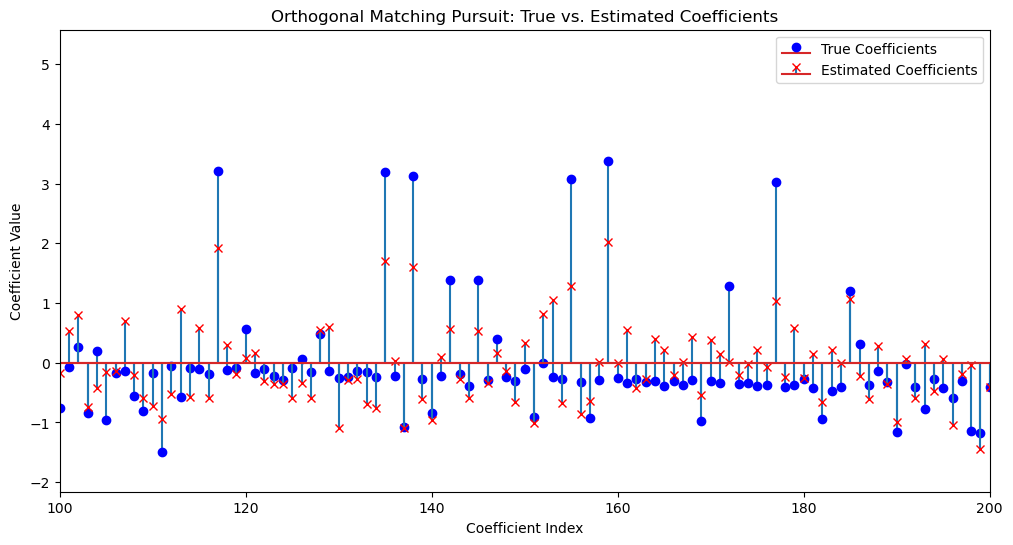

In [18]:
import matplotlib.pyplot as plt
z=Z[0,:]
z_rec=Z_reconstructed[0,:]

plt.figure(figsize=(12, 6))
plt.stem(z, markerfmt='bo', label='True Coefficients')
plt.stem(z_rec, markerfmt='rx', label='Estimated Coefficients')
plt.xlim(100,200)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()

In [ ]:
#finding dictionary for X-avg(x): Itay - run fron this!

from sklearn.decomposition import DictionaryLearning
import numpy as np
import create_data_upd as OD
from sklearn.linear_model import orthogonal_mp

# Define dimensions
n_features = 4000   # Number of columns in A
cs_ratio=0.5
n_samples = cs_ratio*n_features  # Number of rows in A (measurements)
k_sparse = 5  #precentage
len_test = 1000
rows = 400
cols = 10
sig1vt_supp=10
zt_noise_sigma=0.01
data = OD.Data(rows=rows, cols=cols, sig1vt_supp=sig1vt_supp, k_sparse=k_sparse,zt_noise_sigma=zt_noise_sigma)
X_dataset_test, C_dataset_test, Z_dataset_test = data.create_Dataset(len_test)

In [ ]:
# Generate some sample data

X_AVG=X_dataset_test-X_dataset_test.mean(axis=2,keepdims=True)
X_AVG=X_dataset_test.reshape(len_test,-1,order='F')

X_AVG=(X_AVG-X_AVG.mean())/X_AVG.std()


# Instantiate a DictionaryLearning object
dict_learner_od_x = DictionaryLearning(n_components=2000,  # number of dictionary elements
                                  transform_algorithm='lasso_lars',  # sparse coding method
                                  transform_alpha=0.1,  # sparsity controlling parameter
                                  random_state=0)

# Fit to the data and transform it
V_od_x = dict_learner_od_x.fit_transform(X_AVG)

# Extract the dictionary
D_od_x = dict_learner_od_x.components_

# Check the shape of the outputs
print("Dictionary shape:", D_od_x.shape)
print("Transformed data (sparse codes) shape:", V_od_x.shape)


In [ ]:
sparse_codes_x = orthogonal_mp(D_od_x, X_AVG.T, n_nonzero_coefs=5, precompute=True)

# Check the shape of the output
print("Shape of sparse codes:", sparse_codes_x.shape)
X_reconstructed = np.dot(D_od_x, sparse_codes_x)

# Transpose back if necessary
X_reconstructed = X_reconstructed.T

# Calculate reconstruction error
recovery_error = np.linalg.norm(X_AVG - X_reconstructed) / np.linalg.norm(X_AVG)
print("Relative recovery error: {:.4f}".format(recovery_error))

In [ ]:
x=X_AVG[0,:]
x_rec=X_reconstructed[0,:]

plt.figure(figsize=(12, 6))
plt.stem(z, markerfmt='bo', label='True Coefficients')
plt.stem(z_rec, markerfmt='rx', label='Estimated Coefficients')
plt.xlim(110,170)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()